Nama : Aditya Eka Purwanto<br>
NIM : 211351005<br>
Kelas : Malam B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityaekap","key":"49e69d7cf514486a9097b198928b33ba"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d abhia1999/chronic-kidney-disease

  0% 0.00/5.61k [00:00<?, ?B/s]
100% 5.61k/5.61k [00:00<00:00, 7.59MB/s]


In [4]:
!mkdir chronic-kidney-disease
!unzip chronic-kidney-disease.zip -d chronic-kidney-disease
!ls chronic-kidney-disease

Archive:  chronic-kidney-disease.zip
  inflating: chronic-kidney-disease/new_model.csv  
new_model.csv


# import library yang digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics


import pickle
import warnings
warnings.simplefilter("ignore")

# Data Discovery

In [6]:
df = pd.read_csv('/content/chronic-kidney-disease/new_model.csv')

In [7]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


Melihat informasi pada tiap-tiap kolom pada dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


Output dibawah kita bisa melihat jumlah data, nilai min, max dan sebagainya dari tiap-tiap kolom

In [9]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


Dataset ini memiliki 400 baris dan 14 kolom

In [10]:
df.shape

(400, 14)

# EDA (minimal 5)

Pertama mari kita lihat korelasi antar kolom dengan menggunakan heatmap, dapat kita lihat htn memilki korelasi paling tinggi dengan label diantara kolom yang lain

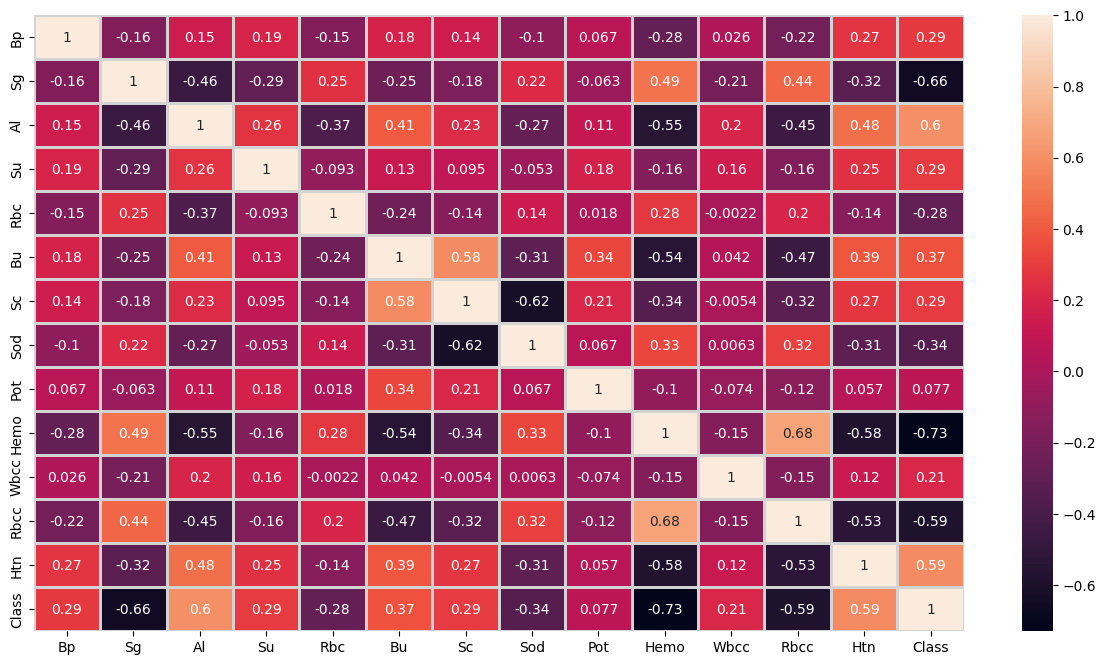

In [11]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

Selanjutnya kita lihat distribusi data dari tiap-tiap feature

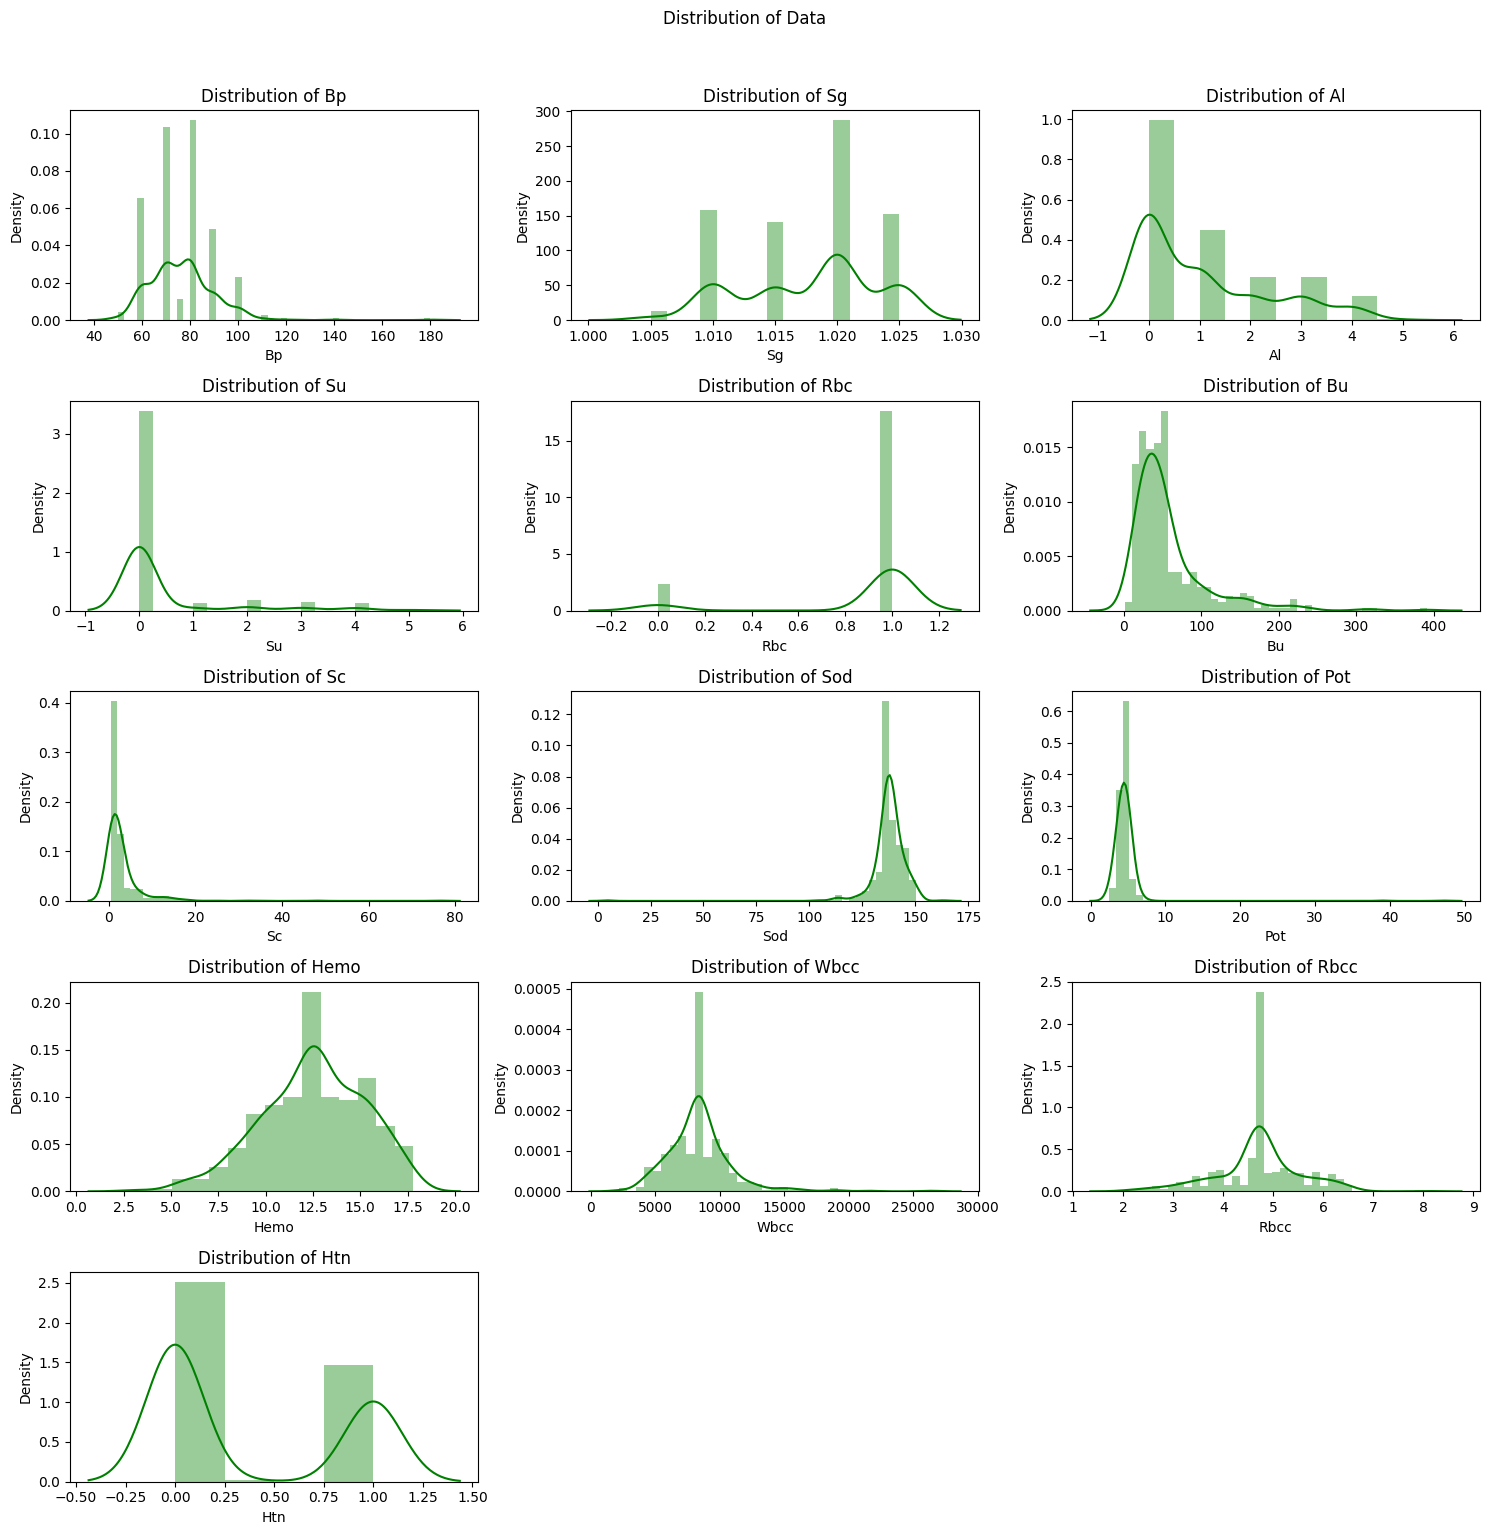

In [12]:
features = df.columns[:-1]

num_rows = len(features) // 3 + (len(features) % 3 > 0)
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

if num_rows == 1:
    axes = [axes]

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    sns.distplot(df[feature], color='green', ax=ax)
    ax.set_title(f'Distribution of {feature}')

if len(features) < num_rows * num_cols:
    for i in range(len(features), num_rows * num_cols):
        fig.delaxes(axes[i // num_cols][i % num_cols])

fig.suptitle("Distribution of Data", y=1.02)
plt.tight_layout()
plt.show()

Disini saya membuat fungsi untuk membuat plot

In [13]:
def violin(col):
    fig = px.violin(df, y=col, x="Class", color="Class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="Class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

Tidak memiliki hipertensi memiliki kemungkinan lebih besar untuk tidak terkena ginjal kronis

In [14]:
violin("Htn")

 kadar BU (Blood Urea) tinggi memiliki risiko lebih tinggi untuk terkena ginjal kronis

In [15]:
violin("Bu")

Berdasarkan grafik dibawah kadar hemogoblin rendah memiliki risiko lebih tinggi untuk mengalami ginjal kronis



In [16]:
violin("Hemo")

Berdasarkan plot dibawah dapat disimpulkan dengan kadar Rbcc rendah memiliki risiko lebih tinggi untuk mengalami ginjal kronis

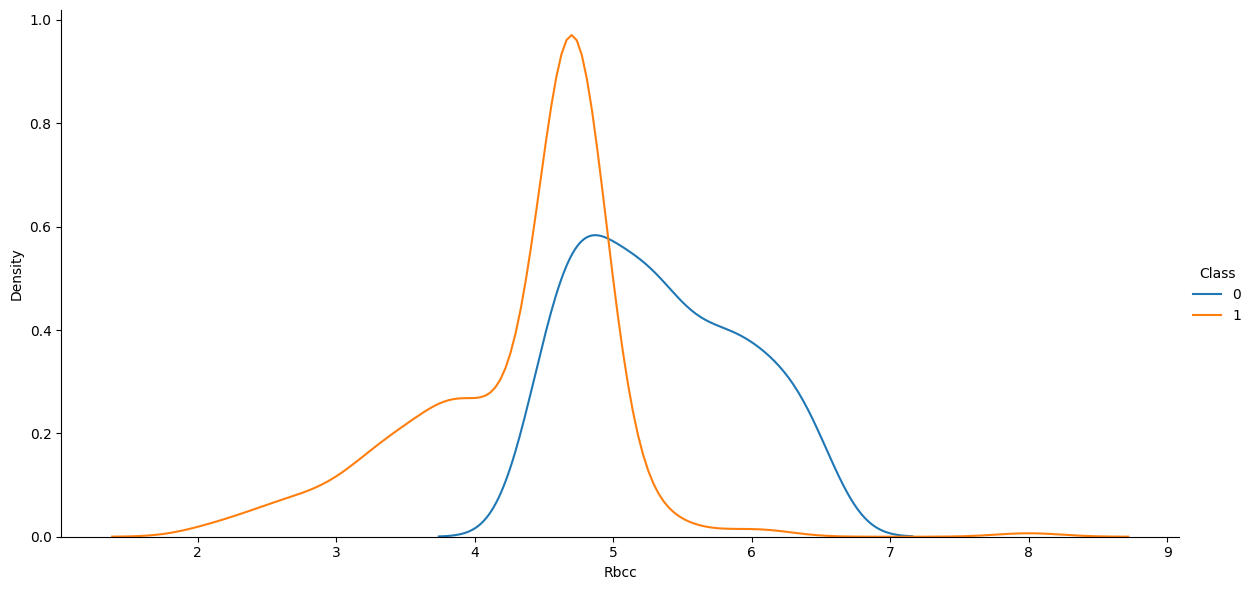

In [17]:
kde("Rbcc")

Berbeda dengan Rbcc, Wbcc tinggi memiliki risiko lebih tinggi untuk mengalami ginjal kronis walaupun tidak terlalu signifikan

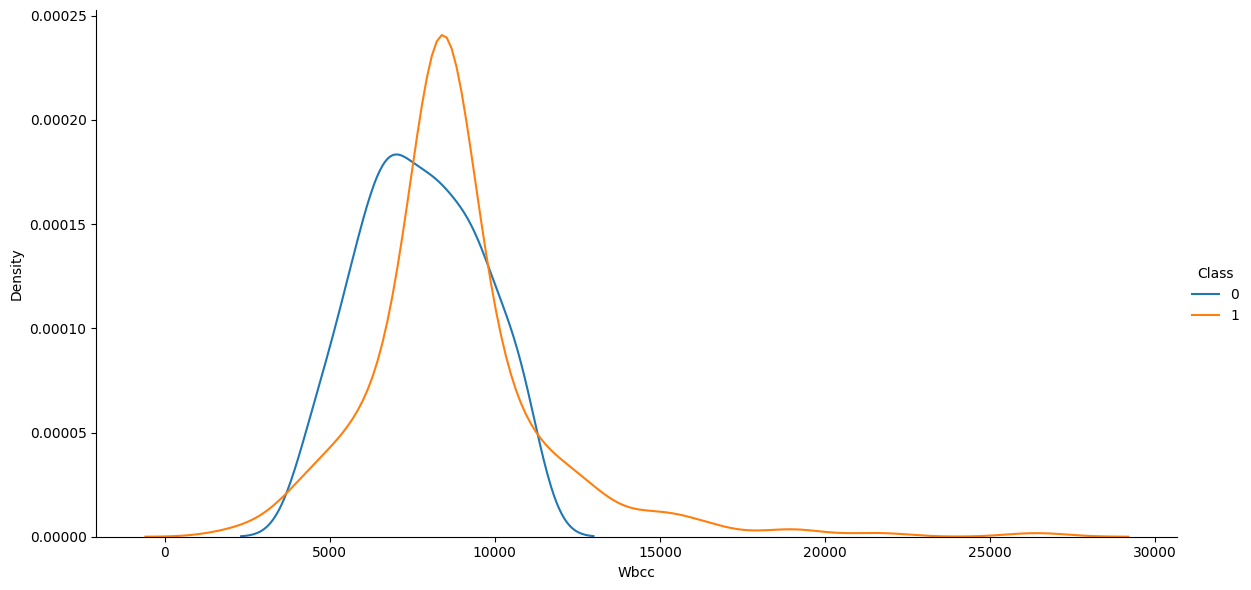

In [18]:
kde("Wbcc")

# Preprocessing

Pertama kita cek apakah ada data yang null

In [19]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

Lalu melihat data yang duplikat

In [20]:
df.duplicated().sum()

0

Membuat variabel untuk modeling X feature y label

In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

Split data menjadi dua subset proporsi data yang akan dialokasikan sebagai data test 20%, sementara 80% sisanya akan menjadi data train.



In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# modeling

Lanjut membuat model dengan model decision tree dengan kriteria entropy

In [23]:
Dtree = DecisionTreeClassifier(criterion='entropy',random_state=20)

In [24]:
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [25]:
y_pred = Dtree.predict(X_test)

Print akurasi yang kita dapatkan dari model ini, hasilnya cukup memuaskan yaitu 100%

In [26]:
print("Akurasi model decision tree = ", accuracy_score(y_test,y_pred) * 100)

Akurasi model decision tree =  100.0


# Visualisasi hasil algoritma

Model ini mulai dengan memeriksa apakah kadar hemoglobin (Hemo) pasien kurang dari atau sama dengan 12,95. Jika ya, maka model akan memeriksa apakah kadar serum kreatinin (Sc) pasien kurang dari atau sama dengan 1,15. Jika ya, maka model akan memprediksi bahwa pasien menderita gagal ginjal. Jika tidak, maka model akan memprediksi bahwa pasien tidak menderita gagal ginjal.


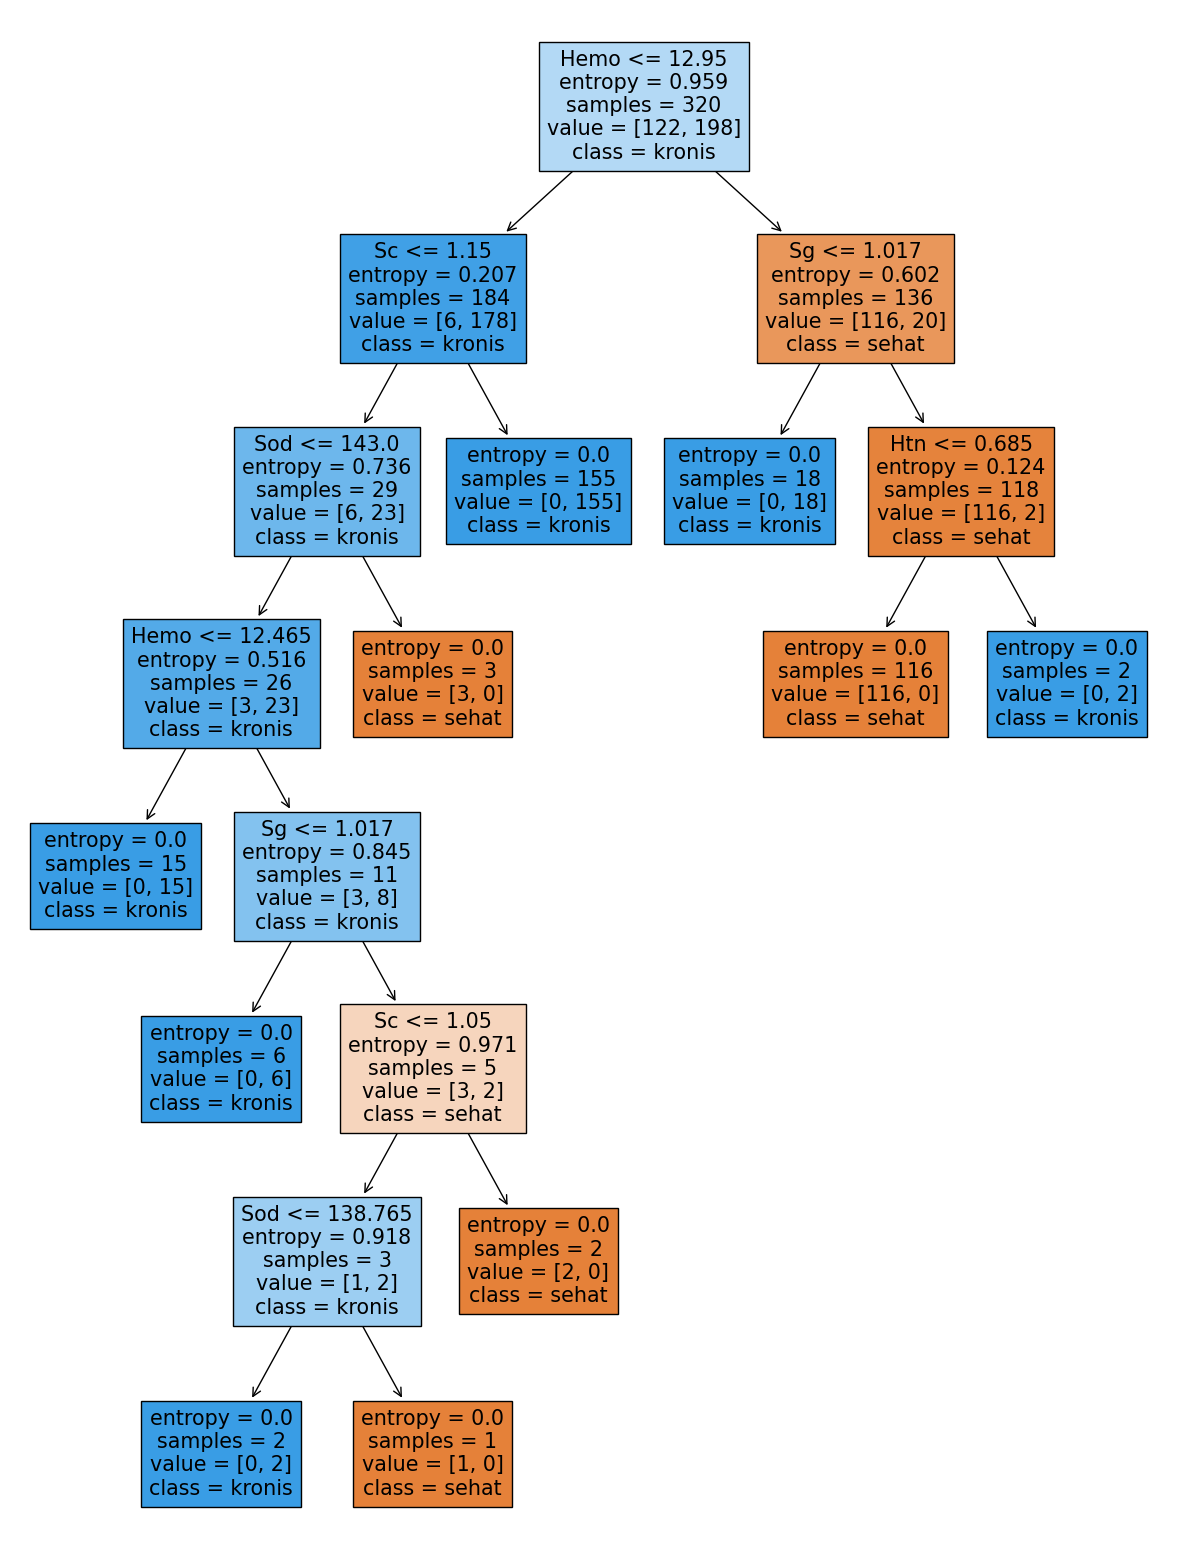

In [32]:
feature = [col for col in df.columns if col != 'Class']
# label = 'Class'

fig = plt.figure(figsize=(15,20))
_ = tree.plot_tree(Dtree,
                   feature_names=feature,
                   class_names=["sehat", "kronis"],
                   filled=True)

In [28]:
df.head(1)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.02,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.2,1.0,1


Kita coba prediksi berdasarkan decision tree, hasilnya benar Hemo sangat berpengaruh pada prediksi model ini

In [29]:
Bp = 10
Al = 1
Su = 0
Rbc = 10
Bu = 5
Sod = 123
Pot = 4

Sc = 1.2  # Memiliki ginjal krnois
Hemo = 10 # Memiliki ginjal krnois

# Hemo = 13 # Sehat
# Sg = 1.5 # Sehat

Sg = 1

Wbcc = 6800
Rbcc = 5.4
Htn = 1

input_data = np.array([[Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn]])

prediction = Dtree.predict(input_data)
if(prediction[0] == 1):
  print("Memiliki ginjal kronis")
else:
  print("Sehat")

Memiliki ginjal kronis


# save model (pickle)

In [30]:
filename = 'kidney_dt.sav'
pickle.dump(Dtree, open(filename, 'wb'))

# Evalusi Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

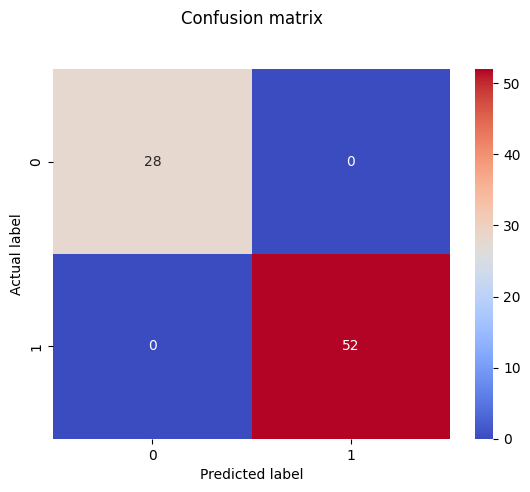

In [31]:
y_pred = Dtree.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')